In [1]:
# Importar las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

### **Explorar el dataset spotify_2023**

In [2]:
# Cargar los datos como DataFrame
spotify_2023 = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_2023

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
# Observar las columnas presentes en el set de datos
spotify_2023.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Tomando en cuenta las columnas presentes en el set de datos, se pueden definir las columnas de la siguiente forma:

- **track_name:** *nombre de la canción*
- **artist(s)_name:** *nombre del o los artistas de la canción*
- **artist_count:** *número de artistas que contribuyen a la canción*
- **released_year:** *año en el cuál se lanzó la canción*
- **released_month:** *mes en el cual se lanzó la canción*
- **released_day:** *día en el cual se lanzó la canción*
- **in_spotify_playlist** *número de listas de reproducción donde se incluye la canción en Spotify*
- **in_spotify_charts:** *precencia y rango de la canción en las listas de éxito de Spotify*
- **streams:** *número total de reproducciones en Spotify*
- **in_apple_playlists:** *número de listas de reproducción donde se incluye la canción en Apple Music*
- **in_apple_charts:** *precencia y rango de la canción en las listas de éxito de Apple Music*
- **in_deezer_playlists:** *número de listas de reproducción donde se incluye la canción en Dreezer*
- **in_deezer_charts:** *precencia y rango de la canción en las listas de éxito de Apple Music*
- **in_shazam_charts:** *presencia y rango de la canción en las listas de éxito de shazam*
- **bpm:** *pulsaciones por minuto, una medida de tiempo de la canción*
- **key:** *tono de la canción*
- **mode:** *modo de la canción, (mayor o menor)*
- **danceability_%:** *porcentaje que indica que tan acta es la canción para bailar*
- **valence_%:** *positividad del contenido de la canción*
- **energy_%:** *percepción del nivel de energía de la canción*
- **acousticness_%:** *cantidad de sonidos acústicos de la canción*
- **instrumentalness_%:** *cantidad de contenido instrumental de la canción*
- **liveness_%:** *presencia de elementos de actuación en vivo*
- **speechiness_%:** *cantidad de palabras habladas en la canción*

Para fines prácticos se eliminaran las columnas 'track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'key' y 'mode'. Esto debido a que se desea estudiar las tendencias presentes en los atributos de las canciones más ecuchadas.

In [4]:
# Eliminar las columnas 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts' y 'in_shazam_charts'.
spotify_2023.drop(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                   'in_deezer_charts', 'in_shazam_charts', 'key', 'mode'], axis = 1, inplace = True)
spotify_2023.head()

,released_year,released_month,released_day,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2023,7,14,125,80,89,83,31,0,8,4
1,2023,3,23,92,71,61,74,7,0,10,4
2,2023,6,30,138,51,32,53,17,0,31,6
3,2019,8,23,170,55,58,72,11,0,11,15
4,2023,5,18,144,65,23,80,14,63,11,6


In [5]:
# Observar la cantidad de valores únicos por columnas
spotify_2023.nunique()

released_year          50
released_month         12
released_day           31
bpm                   124
danceability_%         72
valence_%              94
energy_%               80
acousticness_%         98
instrumentalness_%     39
liveness_%             68
speechiness_%          48
dtype: int64

In [6]:
# Mostrar duplicados
spotify_2023.duplicated().sum()

0

In [7]:
# Información del Dataframe
spotify_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   released_year       953 non-null    int64
 1   released_month      953 non-null    int64
 2   released_day        953 non-null    int64
 3   bpm                 953 non-null    int64
 4   danceability_%      953 non-null    int64
 5   valence_%           953 non-null    int64
 6   energy_%            953 non-null    int64
 7   acousticness_%      953 non-null    int64
 8   instrumentalness_%  953 non-null    int64
 9   liveness_%          953 non-null    int64
 10  speechiness_%       953 non-null    int64
dtypes: int64(11)
memory usage: 82.0 KB


No se encuentran columnas duplicadas, ni valores nulos, así que se procede a transformar los datos de tiempo

In [8]:
# Guardar los datos limpios
spotify_2023.to_csv('spotify_clean.csv')

### **Análisis Exploratorio de los Datos**

In [9]:
# Cargar el dataframe limpio
spotify_clean = pd.read_csv('spotify_clean.csv')
spotify_clean.drop('Unnamed: 0', axis = 1, inplace = True)
spotify_clean

,released_year,released_month,released_day,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2023,7,14,125,80,89,83,31,0,8,4
1,2023,3,23,92,71,61,74,7,0,10,4
2,2023,6,30,138,51,32,53,17,0,31,6
3,2019,8,23,170,55,58,72,11,0,11,15
4,2023,5,18,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...
948,2022,11,3,144,60,24,39,57,0,8,3
949,2022,10,21,166,42,7,24,83,1,12,6
950,2022,11,3,92,80,81,67,4,0,8,6
951,2022,10,20,97,82,67,77,8,0,12,5


In [10]:
# Crear la columna 'released_date' a partir de las columnas released_year	released_month	released_day
spotify_clean['released_date'] = pd.to_datetime(dict(year=spotify_clean.released_year, month=spotify_clean.released_month, day=spotify_clean.released_day))
spotify_clean.head()

,released_year,released_month,released_day,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,2023,7,14,125,80,89,83,31,0,8,4,2023-07-14
1,2023,3,23,92,71,61,74,7,0,10,4,2023-03-23
2,2023,6,30,138,51,32,53,17,0,31,6,2023-06-30
3,2019,8,23,170,55,58,72,11,0,11,15,2019-08-23
4,2023,5,18,144,65,23,80,14,63,11,6,2023-05-18


In [11]:
# Observar la información de los datos
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   released_year       953 non-null    int64         
 1   released_month      953 non-null    int64         
 2   released_day        953 non-null    int64         
 3   bpm                 953 non-null    int64         
 4   danceability_%      953 non-null    int64         
 5   valence_%           953 non-null    int64         
 6   energy_%            953 non-null    int64         
 7   acousticness_%      953 non-null    int64         
 8   instrumentalness_%  953 non-null    int64         
 9   liveness_%          953 non-null    int64         
 10  speechiness_%       953 non-null    int64         
 11  released_date       953 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(11)
memory usage: 89.5 KB


In [12]:
# Eliminar las columnas 'released_year', 'released_month', 'released_day'
spotify_clean.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)
spotify_clean.head()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,125,80,89,83,31,0,8,4,2023-07-14
1,92,71,61,74,7,0,10,4,2023-03-23
2,138,51,32,53,17,0,31,6,2023-06-30
3,170,55,58,72,11,0,11,15,2019-08-23
4,144,65,23,80,14,63,11,6,2023-05-18


In [13]:
# Establecer 'released_date' como indice
spotify_clean.set_index('released_date', inplace=True)

# re-muestrear con frecuencia anual
spotify_resampled_yearly = spotify_clean.resample('A').mean()

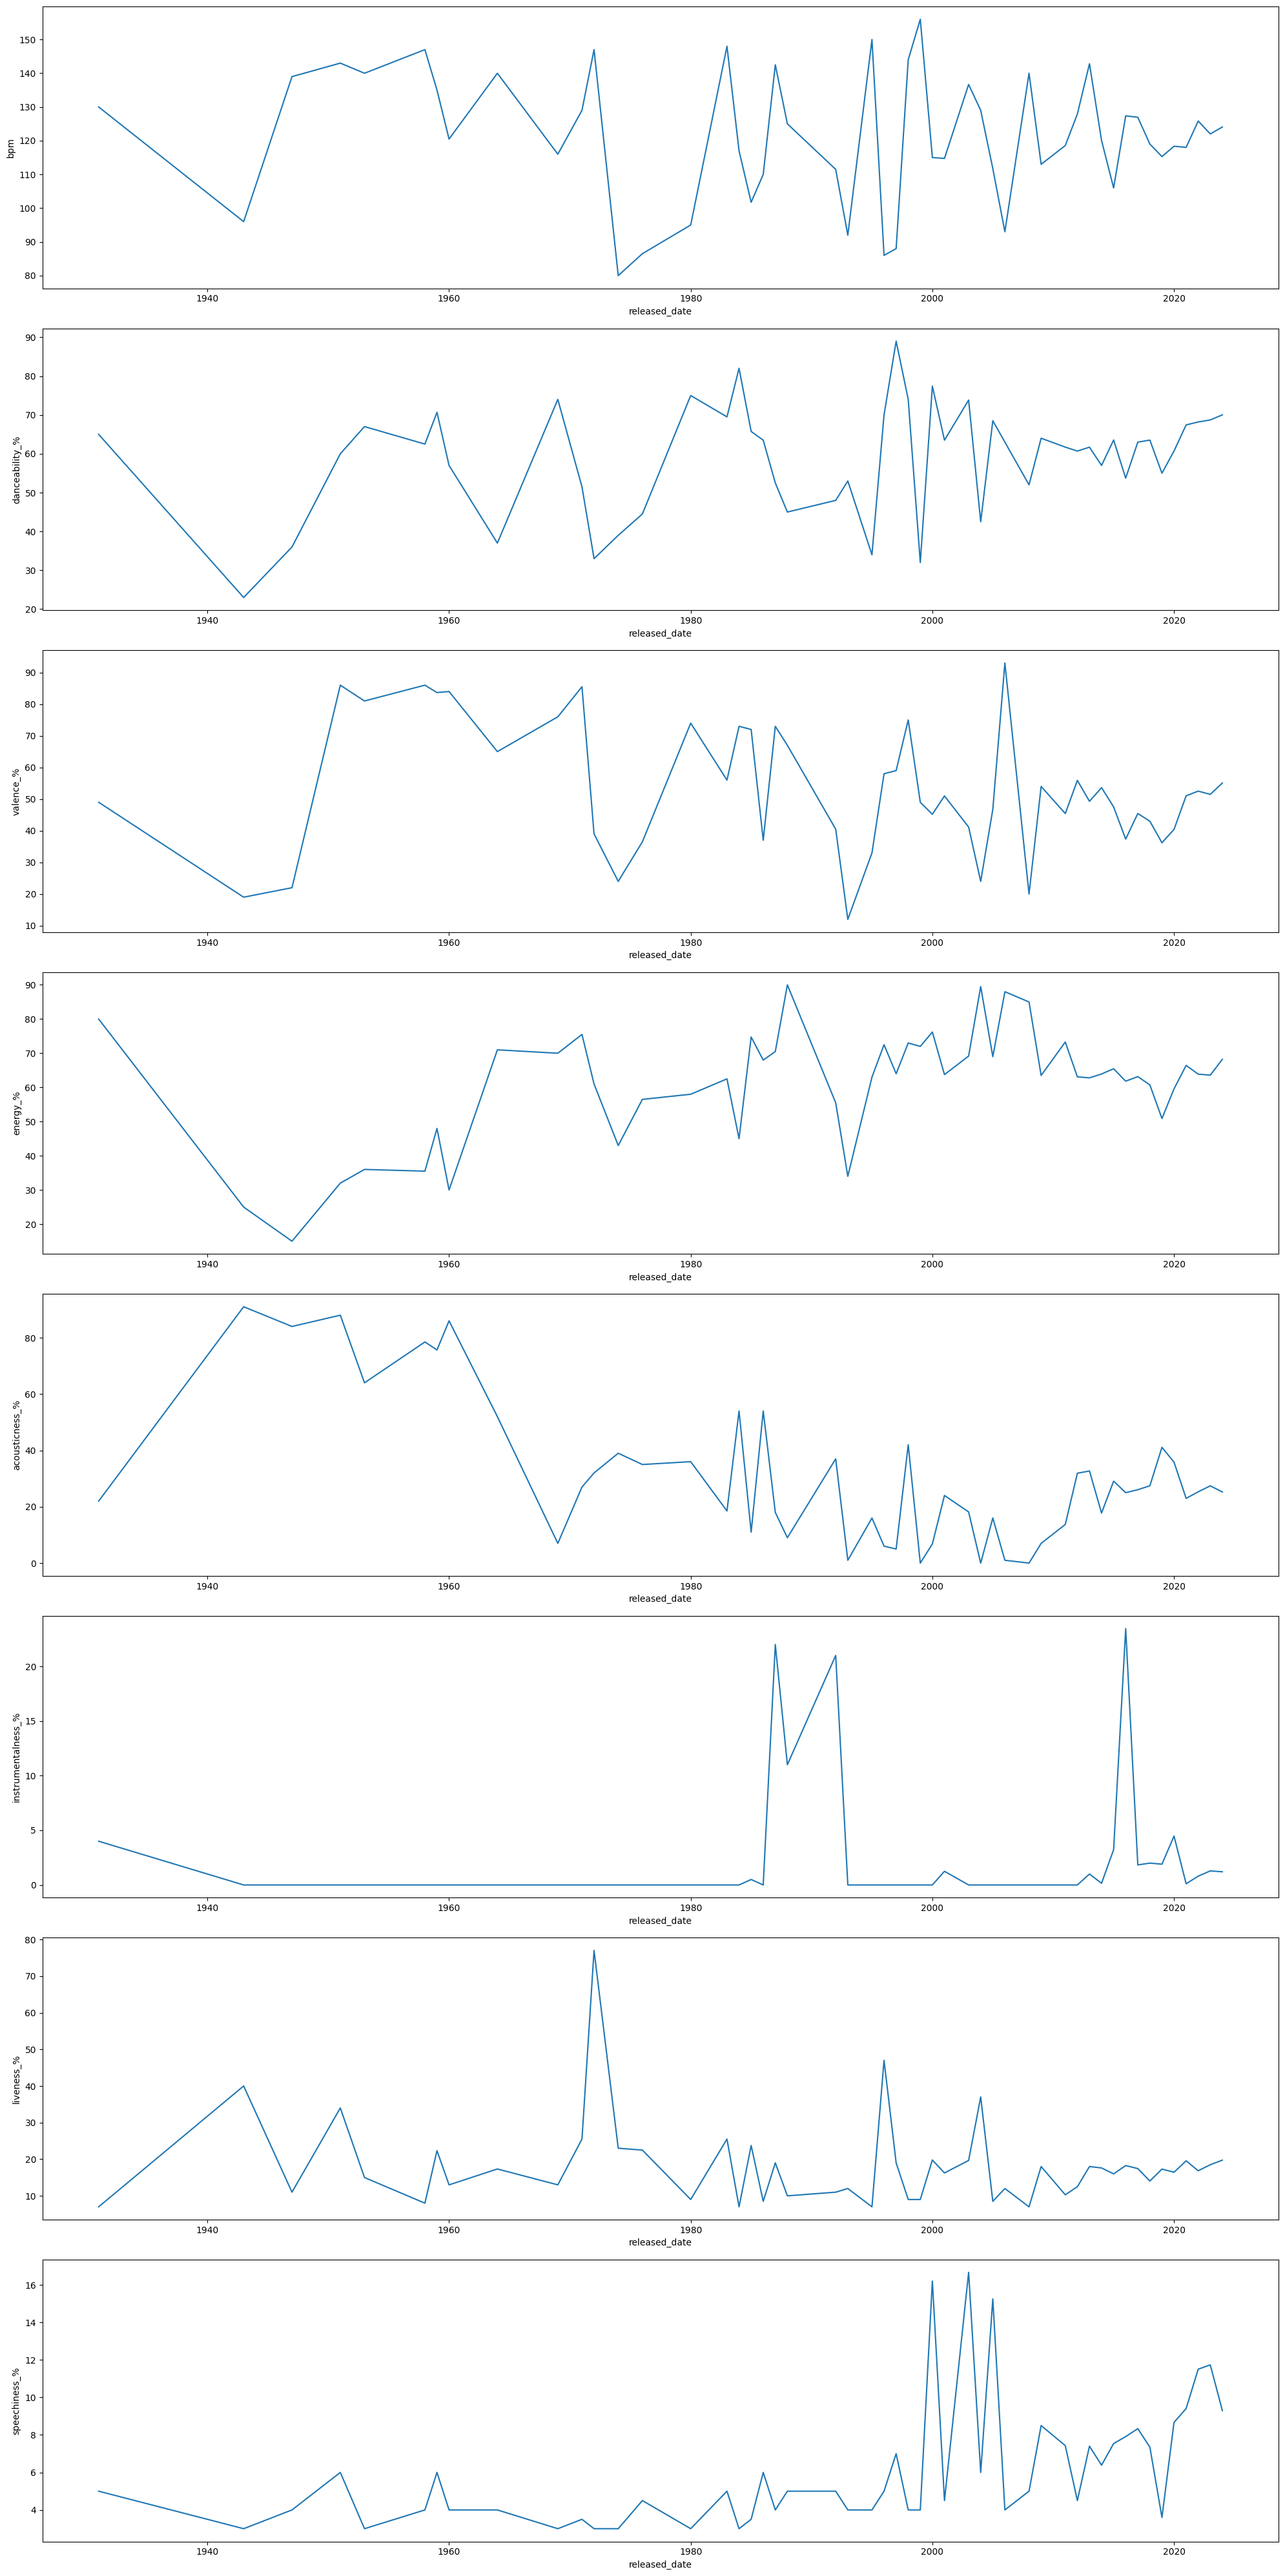

In [14]:
# Observar la evolución de los atributos músicales en el tiempo

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_yearly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[1], data = spotify_resampled_yearly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[2], data = spotify_resampled_yearly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[3], data = spotify_resampled_yearly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[4], data = spotify_resampled_yearly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[5], data = spotify_resampled_yearly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[6], data = spotify_resampled_yearly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[7], data = spotify_resampled_yearly, x = 'released_date', y = 'speechiness_%')

plt.tight_layout()

plt.show()

**Nota:**
-  

#### Analisis de tendencias

In [18]:
spotify_resampled_yearly = spotify_resampled_yearly.dropna()

total_observations_bpm = len(spotify_resampled_yearly['bpm'])
total_observations_danceability = len(spotify_resampled_yearly['danceability_%'])
total_observations_valence = len(spotify_resampled_yearly['valence_%'])
total_observations_energy = len(spotify_resampled_yearly['energy_%'])
total_observations_acousticness = len(spotify_resampled_yearly['acousticness_%'])
total_observations_instrumentalness = len(spotify_resampled_yearly['instrumentalness_%'])
total_observations_liveness = len(spotify_resampled_yearly['liveness_%'])
total_observations_speechiness = len(spotify_resampled_yearly['speechiness_%'])

number_of_cycles = 50

period_bpm = total_observations_bpm // number_of_cycles
period_danceability = total_observations_danceability // number_of_cycles
period_valence = total_observations_valence // number_of_cycles
period_energy = total_observations_energy // number_of_cycles
period_acousticness = total_observations_acousticness // number_of_cycles
period_instrumentalness = total_observations_instrumentalness // number_of_cycles
period_liveness = total_observations_liveness // number_of_cycles
period_speechiness = total_observations_speechiness // number_of_cycles

decomposition_bpm = seasonal_decompose(spotify_resampled_yearly['bpm'], period = period_bpm)
decomposition_danceability = seasonal_decompose(spotify_resampled_yearly['danceability_%'], period = period_danceability)
decomposition_valence = seasonal_decompose(spotify_resampled_yearly['valence_%'], period = period_valence)
decomposition_energy = seasonal_decompose(spotify_resampled_yearly['energy_%'], period = period_energy)
decomposition_acousticness = seasonal_decompose(spotify_resampled_yearly['acousticness_%'], period = period_acousticness)
decomposition_instrumentalness = seasonal_decompose(spotify_resampled_yearly['instrumentalness_%'], period = period_instrumentalness)
decomposition_liveness = seasonal_decompose(spotify_resampled_yearly['liveness_%'], period = period_liveness)
decomposition_speechiness = seasonal_decompose(spotify_resampled_yearly['speechiness_%'], period = period_speechiness)

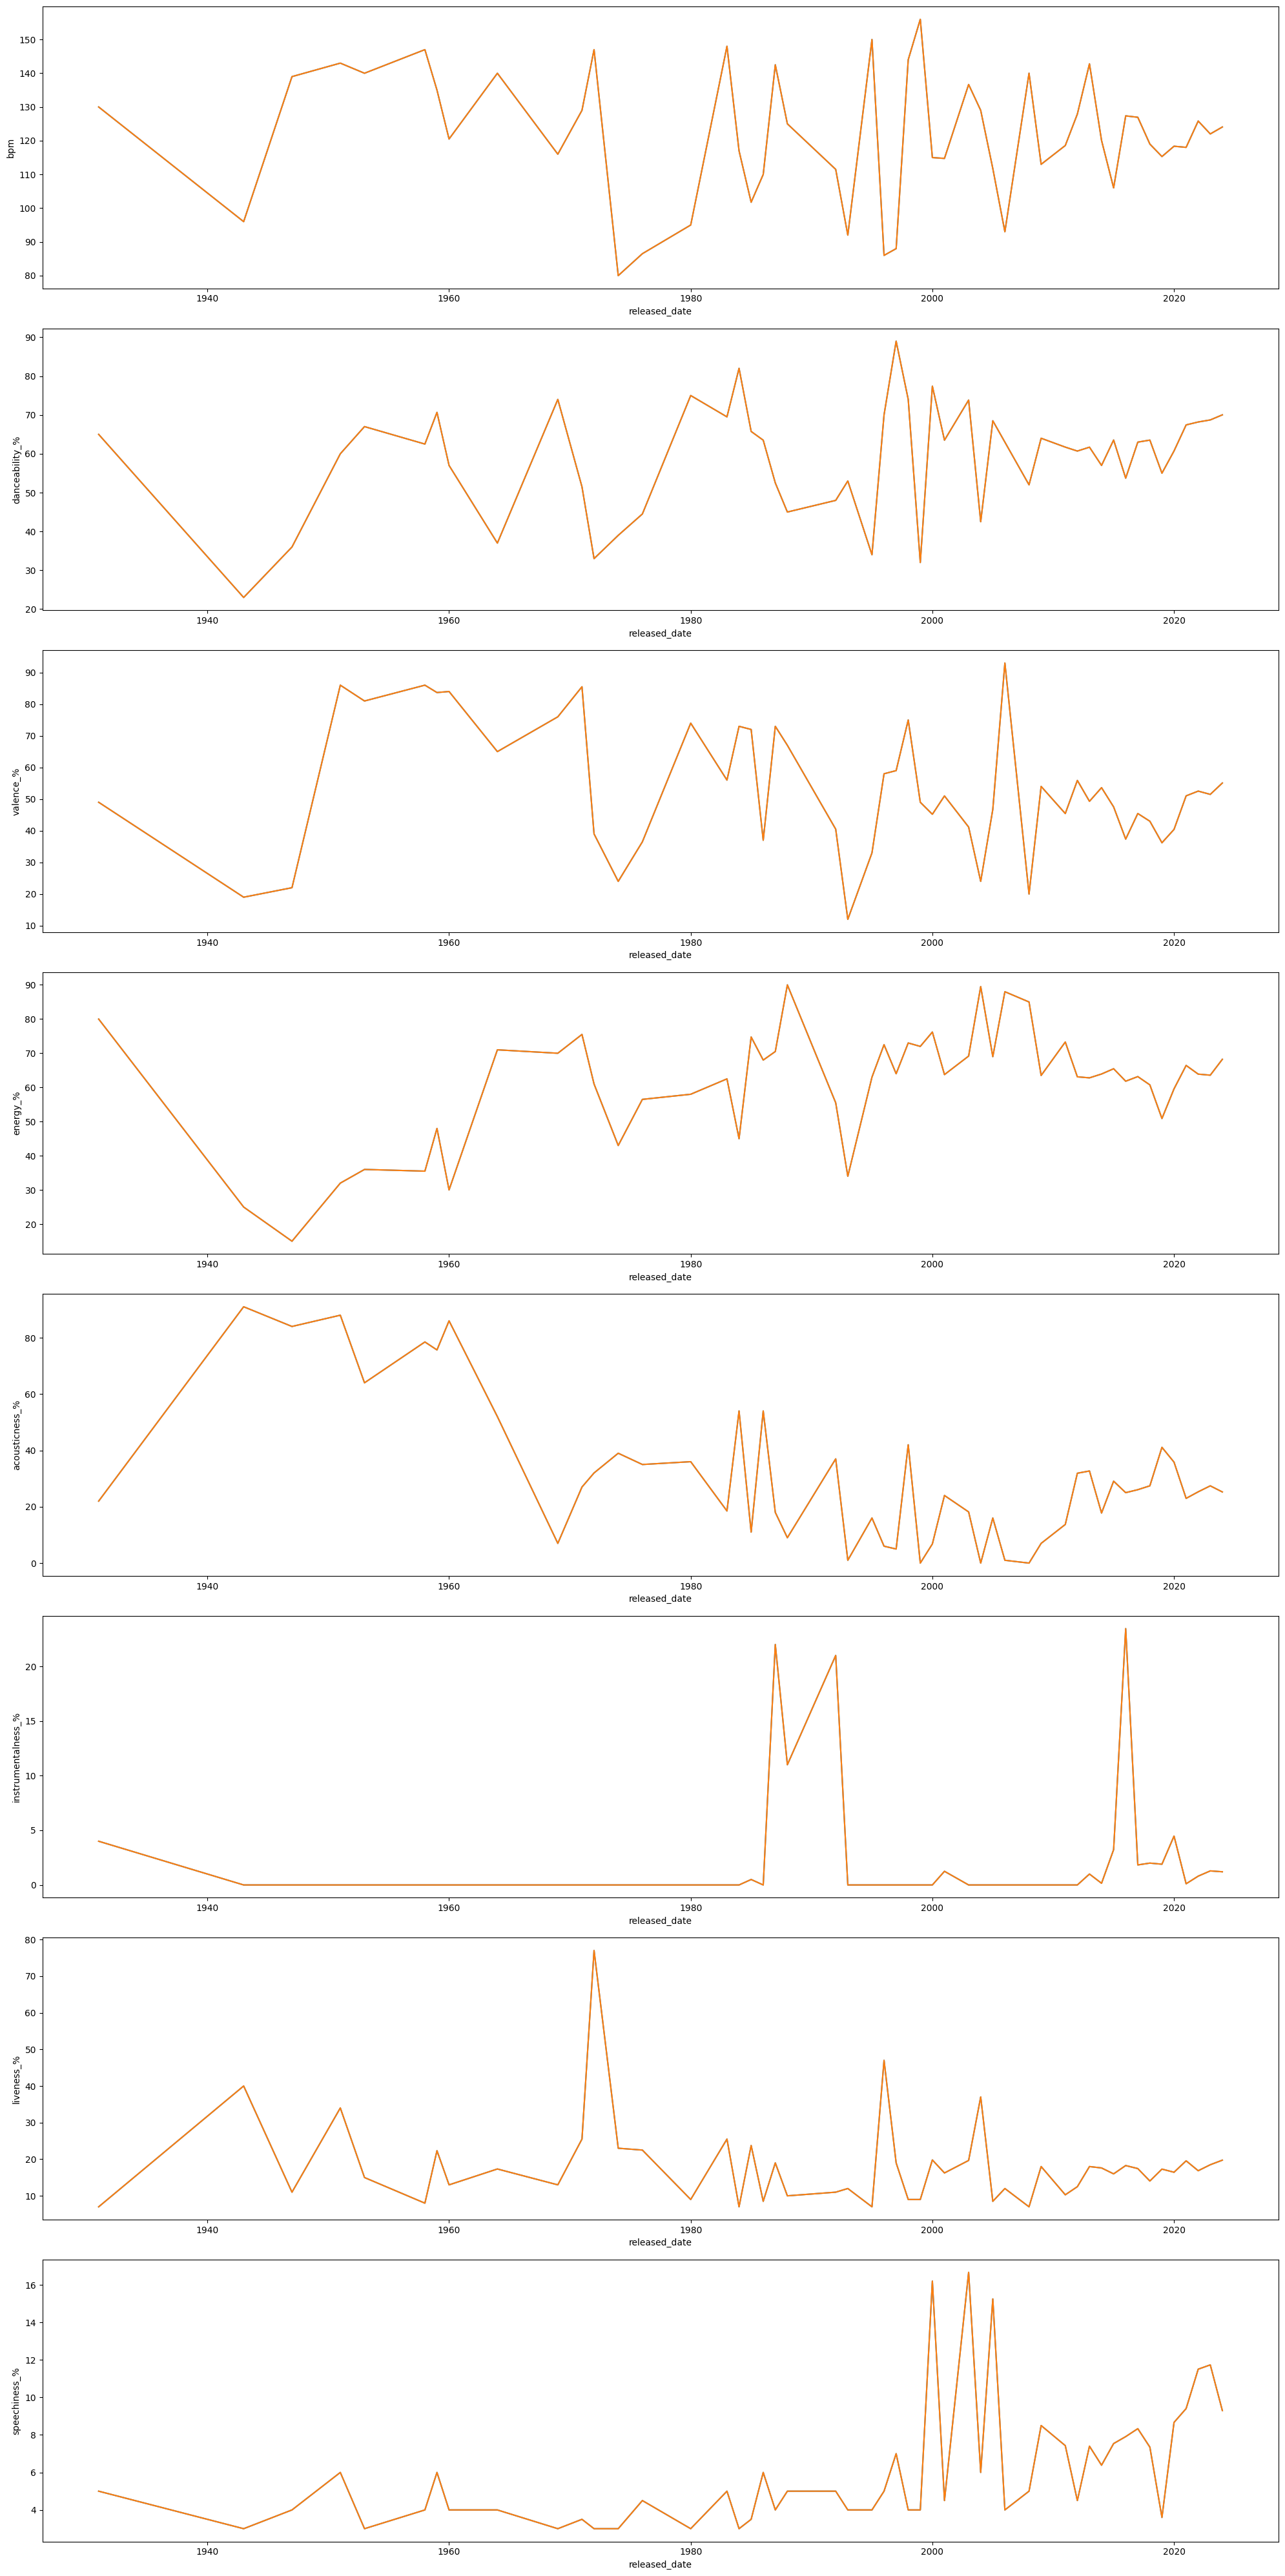

In [19]:
trend_bpm = decomposition_bpm.trend
trend_danceability = decomposition_danceability.trend
trend_valence = decomposition_valence.trend
trend_energy = decomposition_energy.trend
trend_acousticness = decomposition_acousticness.trend
trend_instrumentalness = decomposition_instrumentalness.trend
trend_liveness = decomposition_liveness.trend
trend_speechiness = decomposition_speechiness.trend

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_yearly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[0], data = trend_bpm)
sns.lineplot(ax = ax[1], data = spotify_resampled_yearly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[1], data = trend_danceability)
sns.lineplot(ax = ax[2], data = spotify_resampled_yearly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[2], data = trend_valence)
sns.lineplot(ax = ax[3], data = spotify_resampled_yearly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[3], data = trend_energy)
sns.lineplot(ax = ax[4], data = spotify_resampled_yearly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[4], data = trend_acousticness)
sns.lineplot(ax = ax[5], data = spotify_resampled_yearly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[5], data = trend_instrumentalness)
sns.lineplot(ax = ax[6], data = spotify_resampled_yearly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[6], data = trend_liveness)
sns.lineplot(ax = ax[7], data = spotify_resampled_yearly, x = 'released_date', y = 'speechiness_%')
sns.lineplot(ax = ax[7], data = trend_speechiness)

plt.tight_layout()

plt.show()

#### Seasonal Analysis

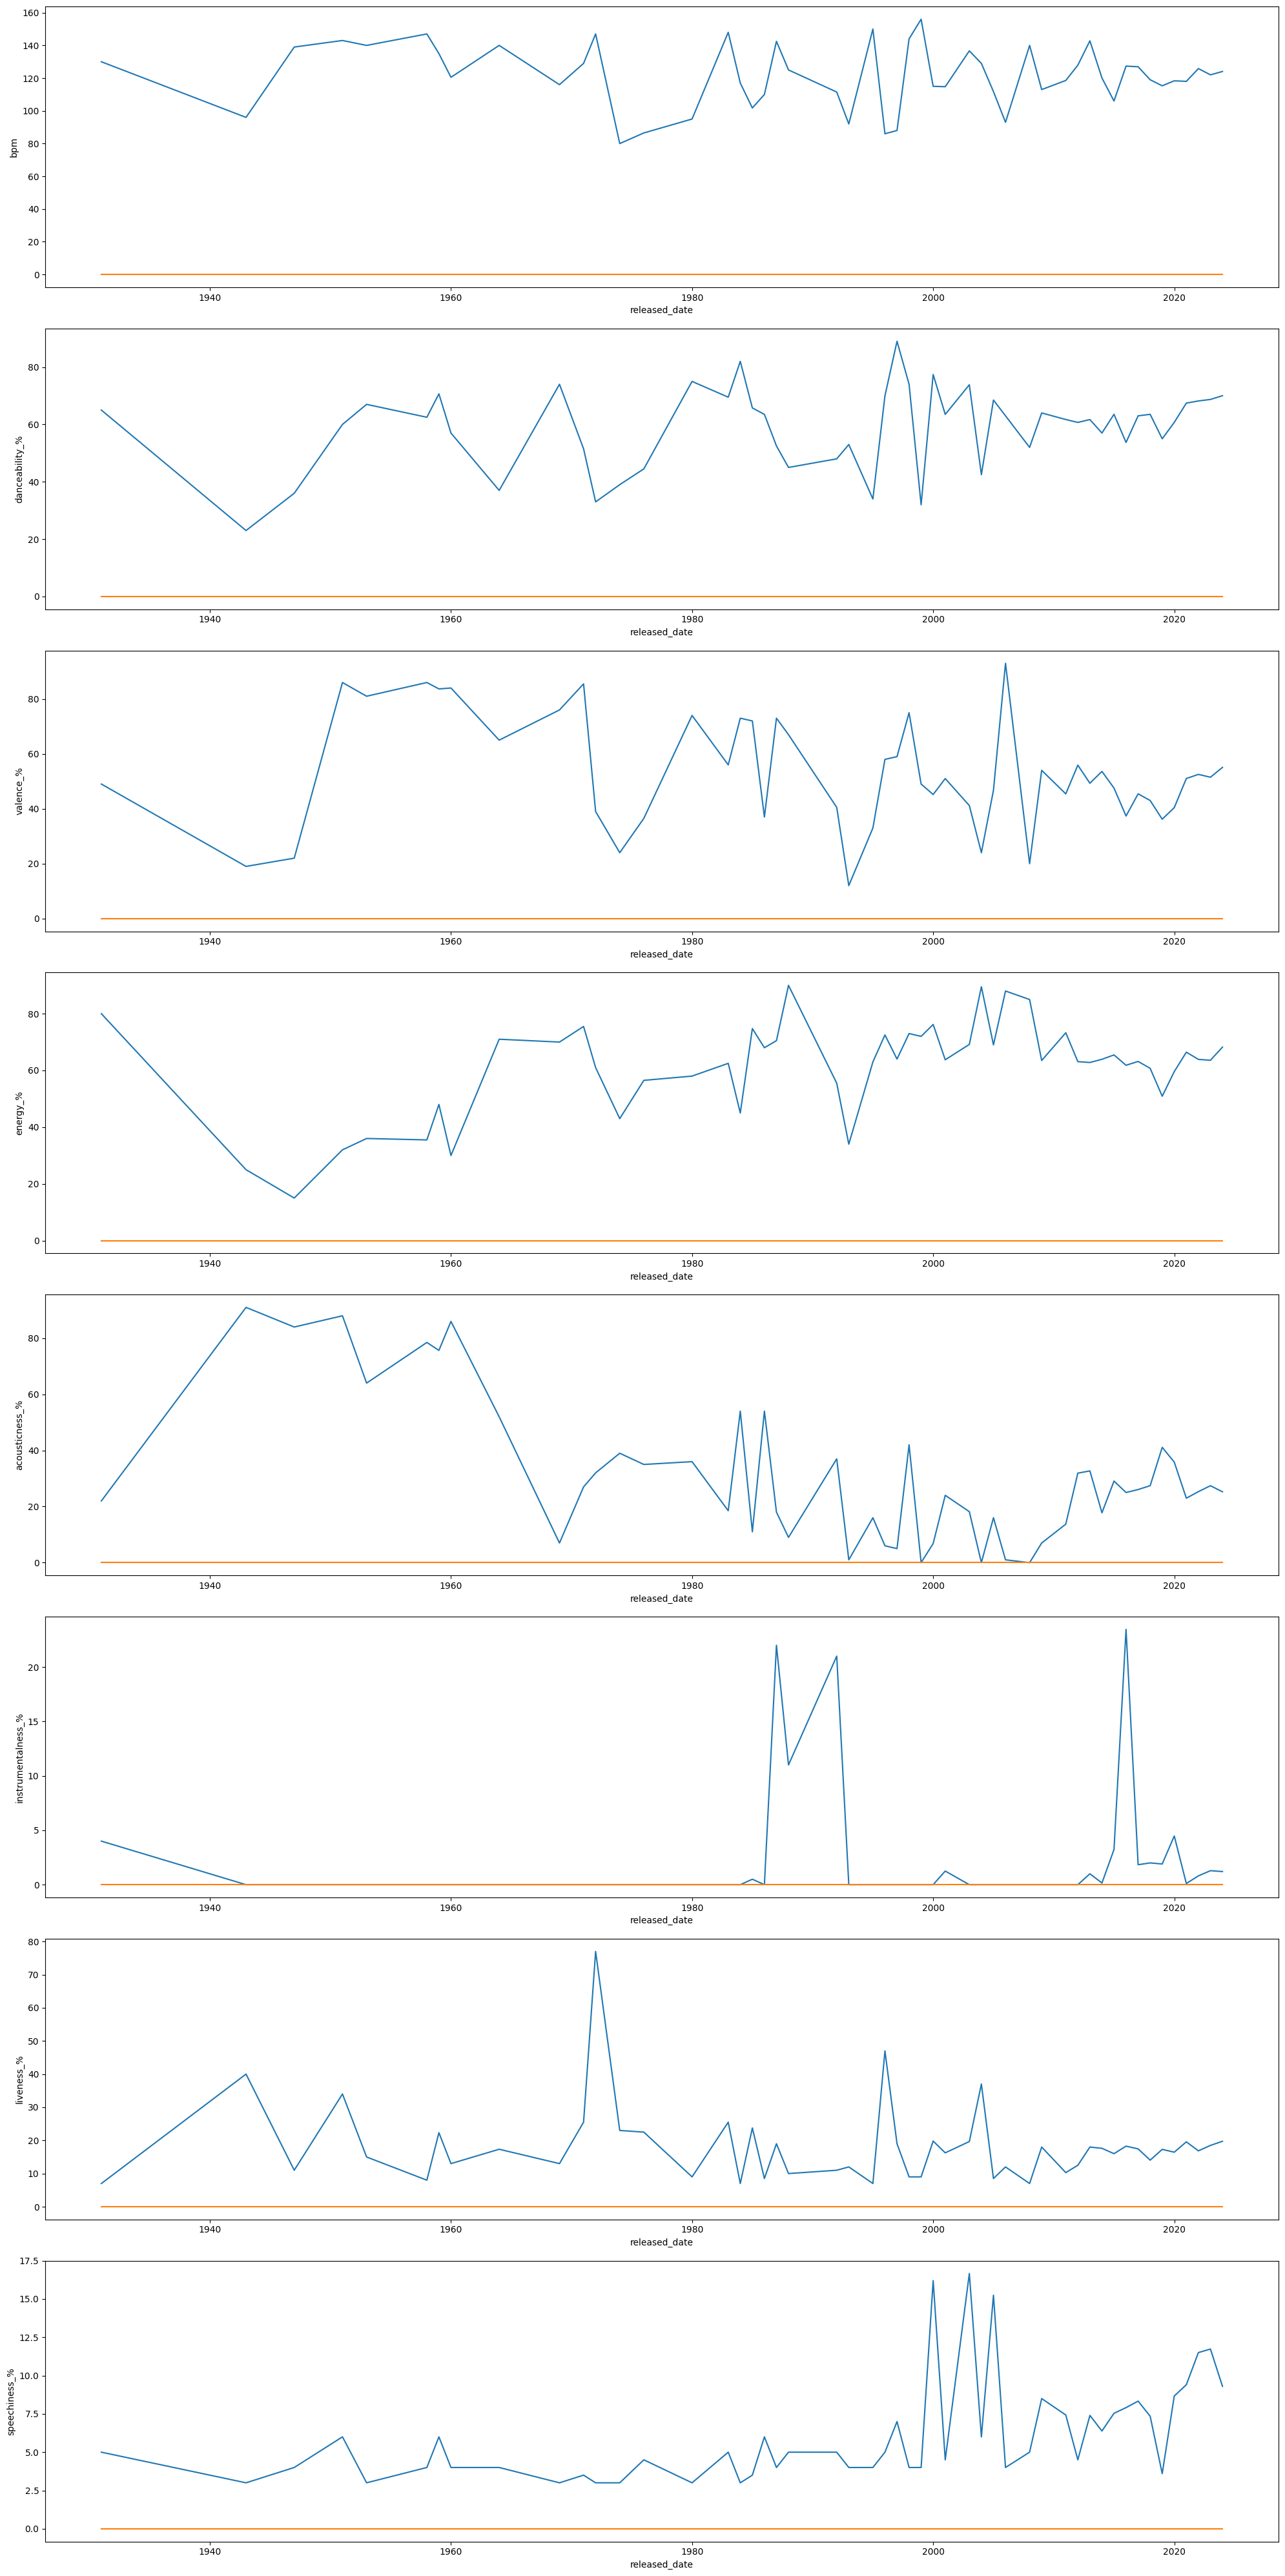

In [20]:
seasonal_bpm = decomposition_bpm.seasonal
seasonal_danceability = decomposition_danceability.seasonal
seasonal_valence = decomposition_valence.seasonal
seasonal_energy = decomposition_energy.seasonal
seasonal_acousticness = decomposition_acousticness.seasonal
seasonal_instrumentalness = decomposition_instrumentalness.seasonal
seasonal_liveness = decomposition_liveness.seasonal
seasonal_speechiness = decomposition_speechiness.seasonal

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_yearly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[0], data = seasonal_bpm)
sns.lineplot(ax = ax[1], data = spotify_resampled_yearly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[1], data = seasonal_danceability)
sns.lineplot(ax = ax[2], data = spotify_resampled_yearly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[2], data = seasonal_valence)
sns.lineplot(ax = ax[3], data = spotify_resampled_yearly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[3], data = seasonal_energy)
sns.lineplot(ax = ax[4], data = spotify_resampled_yearly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[4], data = seasonal_acousticness)
sns.lineplot(ax = ax[5], data = spotify_resampled_yearly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[5], data = seasonal_instrumentalness)
sns.lineplot(ax = ax[6], data = spotify_resampled_yearly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[6], data = seasonal_liveness)
sns.lineplot(ax = ax[7], data = spotify_resampled_yearly, x = 'released_date', y = 'speechiness_%')
sns.lineplot(ax = ax[7], data = seasonal_speechiness)

plt.tight_layout()

plt.show()

In [22]:
# Evaluar estacionalidad de la serie de tiempo

# ADF test for 'bpm'
result_bpm = adfuller(spotify_resampled_yearly['bpm'])
print('ADF Statistic (BPM):', result_bpm[0])
print('p-value (BPM):', result_bpm[1])
print('Critical Values (BPM):', result_bpm[4])

# ADF test for 'danceability_%'
result_danceability = adfuller(spotify_resampled_yearly['danceability_%'])
print('ADF Statistic (danceability_%):', result_danceability[0])
print('p-value (danceability_%):', result_danceability[1])
print('Critical Values (danceability_%):', result_danceability[4])

# ADF test for 'valence_%'
result_valence = adfuller(spotify_resampled_yearly['valence_%'])
print('ADF Statistic (valence_%):', result_valence[0])
print('p-value (valence_%):', result_valence[1])
print('Critical Values (valence_%):', result_valence[4])

# ADF test for 'energy_%'
result_energy = adfuller(spotify_resampled_yearly['energy_%'])
print('ADF Statistic (energy_%):', result_energy[0])
print('p-value (energy_%):', result_energy[1])
print('Critical Values (energy_%):', result_energy[4])

# ADF test for 'acousticness_%'
result_acousticness = adfuller(spotify_resampled_yearly['acousticness_%'])
print('ADF Statistic (acousticness_%):', result_acousticness[0])
print('p-value (acousticness_%):', result_acousticness[1])
print('Critical Values (acousticness_%):', result_acousticness[4])

# ADF test for 'instrumentalness_%'
result_instrumentalness = adfuller(spotify_resampled_yearly['instrumentalness_%'])
print('ADF Statistic (instrumentalness_%):', result_instrumentalness[0])
print('p-value (instrumentalness_%):', result_instrumentalness[1])
print('Critical Values (instrumentalness_%):', result_instrumentalness[4])

# ADF test for 'liveness_%'
result_liveness = adfuller(spotify_resampled_yearly['liveness_%'])
print('ADF Statistic (liveness_%):', result_liveness[0])
print('p-value (liveness_%):', result_liveness[1])
print('Critical Values (liveness_%):', result_liveness[4])

# ADF test for 'speechiness_%'
result_speechiness = adfuller(spotify_resampled_yearly['speechiness_%'])
print('ADF Statistic (speechiness_%):', result_speechiness[0])
print('p-value (speechiness_%):', result_speechiness[1])
print('Critical Values (speechiness_%):', result_speechiness[4])

ADF Statistic (BPM): -3.440597083563874
p-value (BPM): 0.009650360197152381
Critical Values (BPM): {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}
ADF Statistic (danceability_%): -5.746818000878385
p-value (danceability_%): 6.094347146315636e-07
Critical Values (danceability_%): {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ADF Statistic (valence_%): -3.2550519041123804
p-value (valence_%): 0.01701116821603758
Critical Values (valence_%): {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}
ADF Statistic (energy_%): -4.055272806432836
p-value (energy_%): 0.001147195832086671
Critical Values (energy_%): {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ADF Statistic (acousticness_%): -2.4729008337136813
p-value (acousticness_%): 0.12220782814165115
Critical Values (acousticness_%): {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095

#### Analisis de Variabilidad

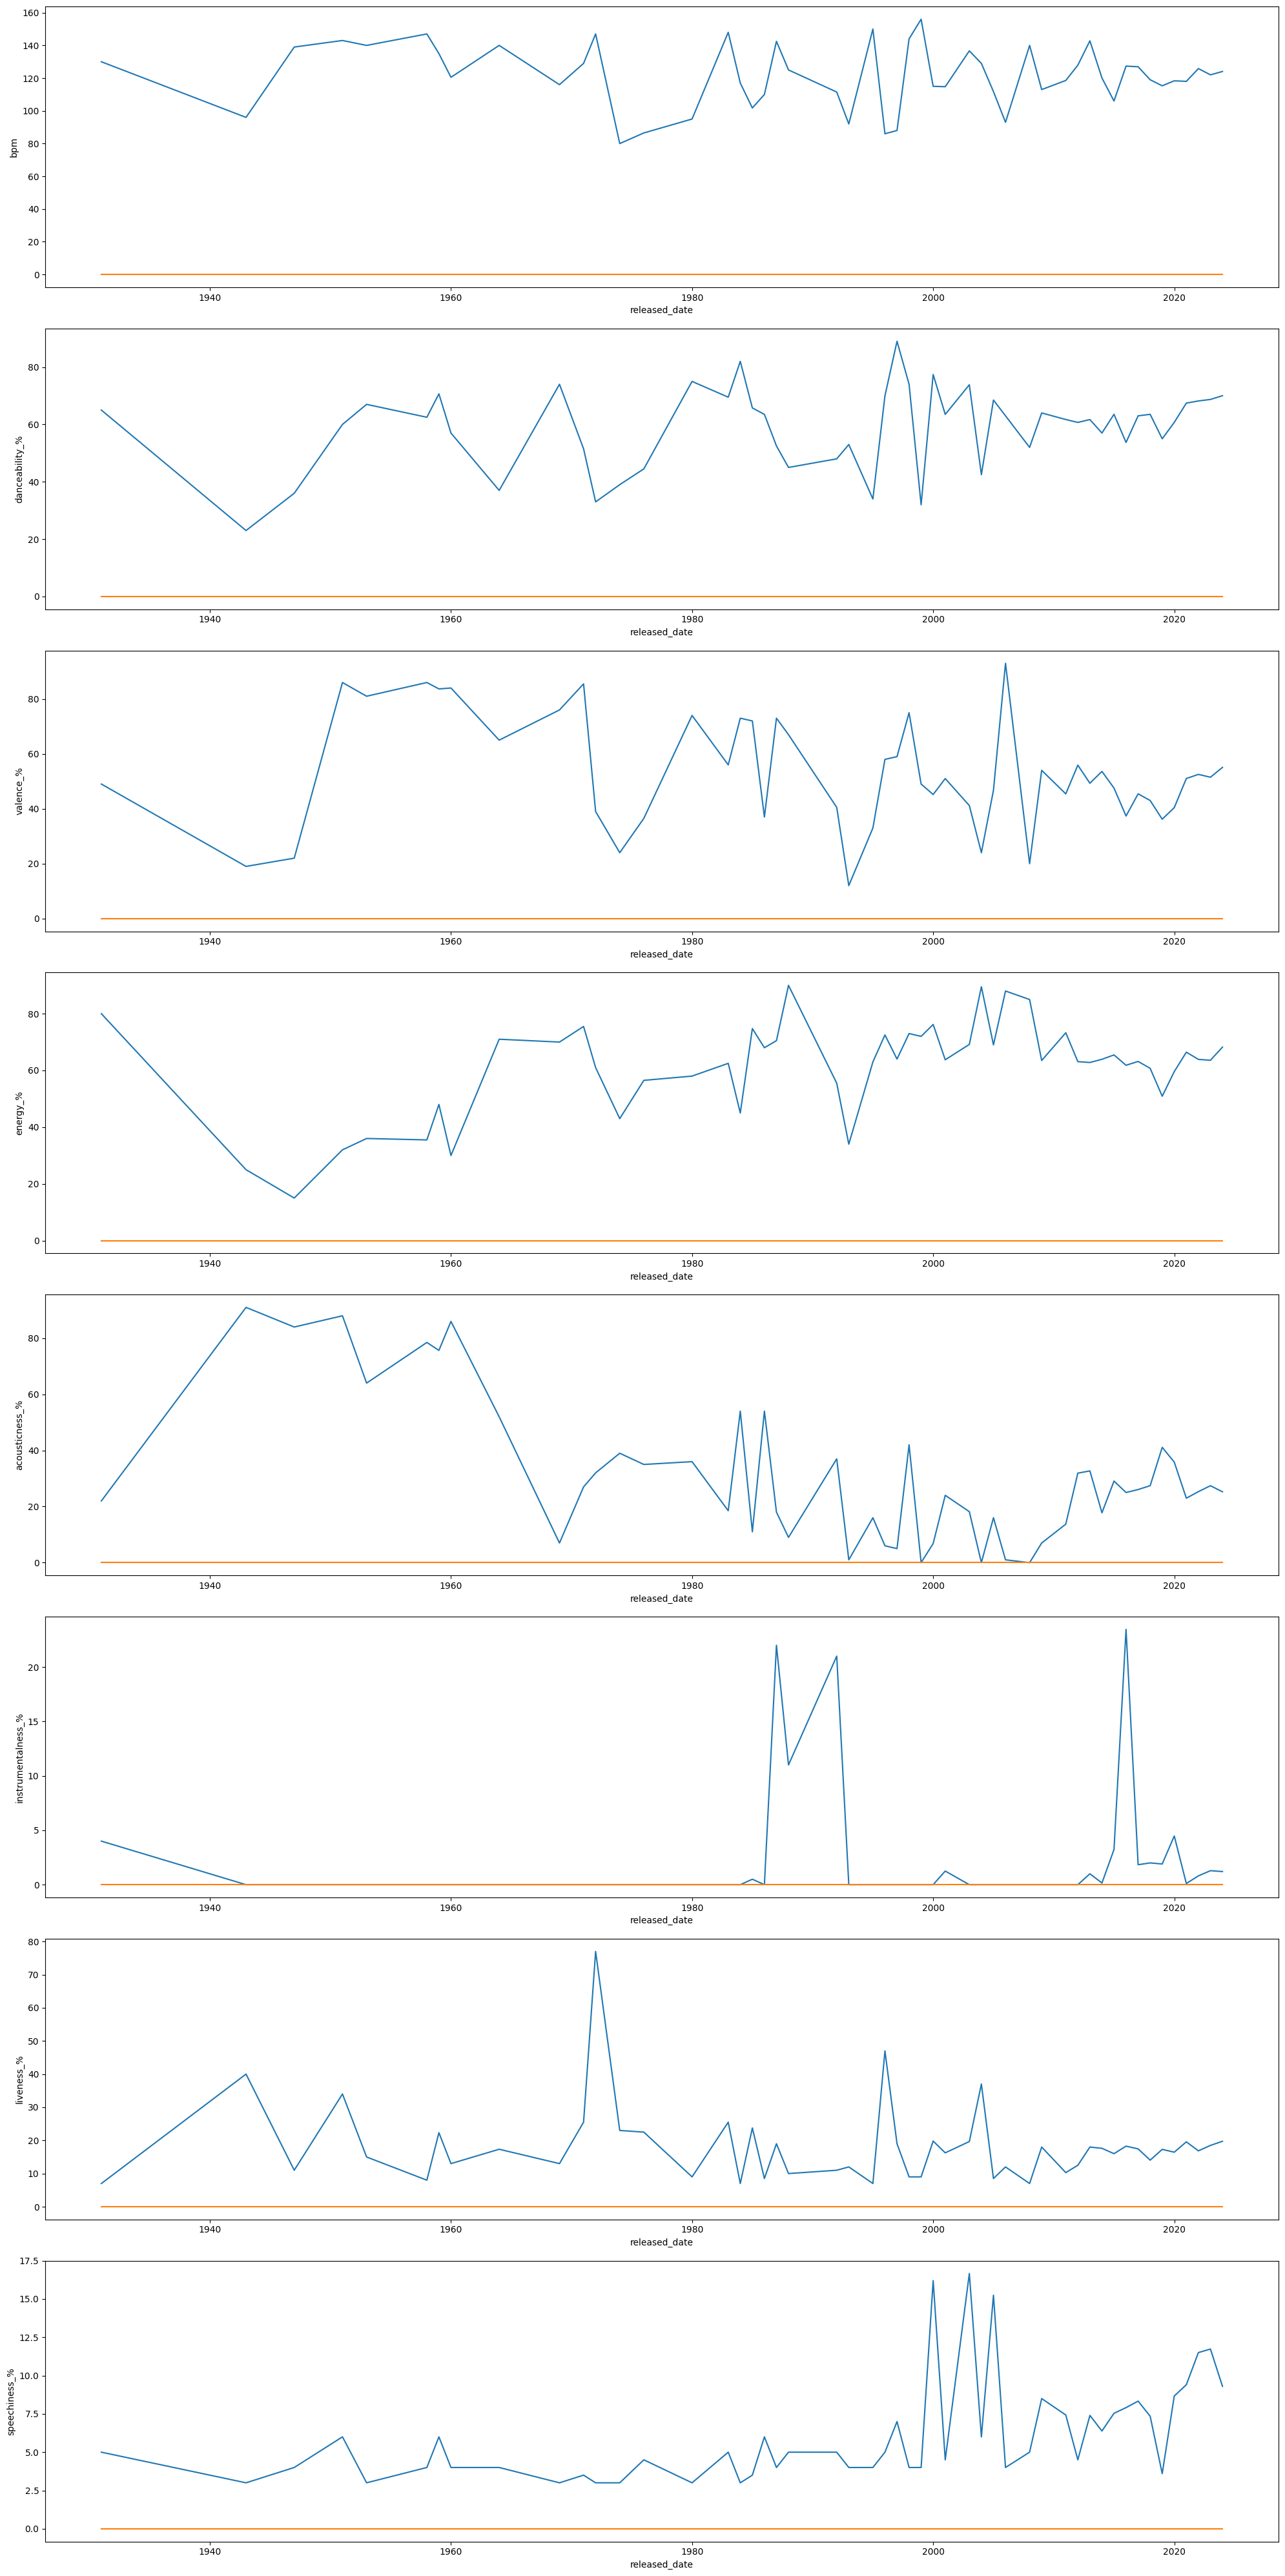

In [24]:
residual_bpm = decomposition_bpm.resid
residual_danceability = decomposition_danceability.resid
residual_valence = decomposition_valence.resid
residual_energy = decomposition_energy.resid
residual_acousticness = decomposition_acousticness.resid
residual_instrumentalness = decomposition_instrumentalness.resid
residual_liveness = decomposition_liveness.resid
residual_speechiness = decomposition_speechiness.resid

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_yearly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[0], data = residual_bpm)
sns.lineplot(ax = ax[1], data = spotify_resampled_yearly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[1], data = residual_danceability)
sns.lineplot(ax = ax[2], data = spotify_resampled_yearly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[2], data = residual_valence)
sns.lineplot(ax = ax[3], data = spotify_resampled_yearly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[3], data = residual_energy)
sns.lineplot(ax = ax[4], data = spotify_resampled_yearly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[4], data = residual_acousticness)
sns.lineplot(ax = ax[5], data = spotify_resampled_yearly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[5], data = residual_instrumentalness)
sns.lineplot(ax = ax[6], data = spotify_resampled_yearly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[6], data = residual_liveness)
sns.lineplot(ax = ax[7], data = spotify_resampled_yearly, x = 'released_date', y = 'speechiness_%')
sns.lineplot(ax = ax[7], data = residual_speechiness)

plt.tight_layout()

plt.show()

#### Evaluación de Autocorrelacion

<Figure size 1200x400 with 0 Axes>

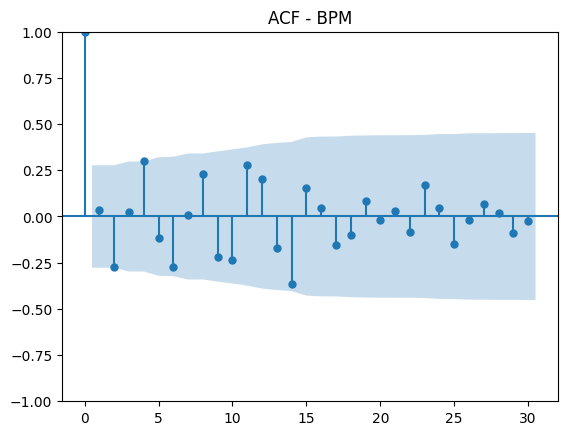

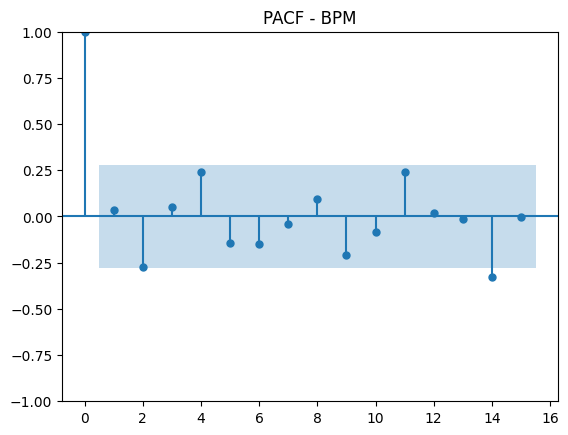

<Figure size 1200x400 with 0 Axes>

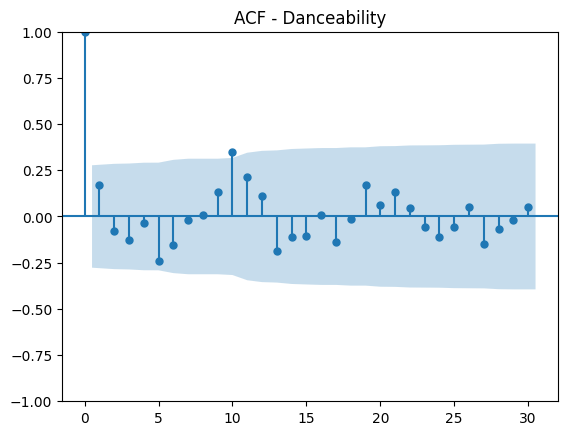

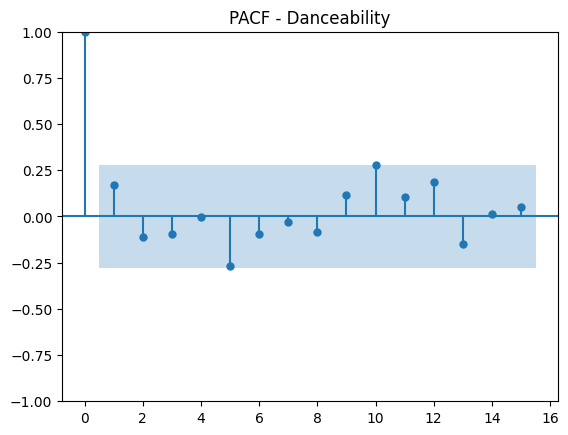

<Figure size 1200x400 with 0 Axes>

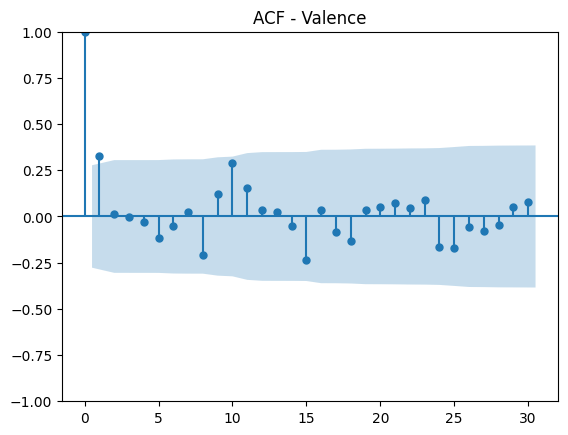

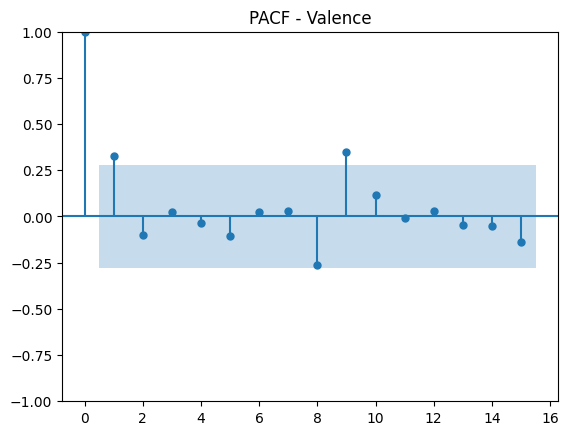

<Figure size 1200x400 with 0 Axes>

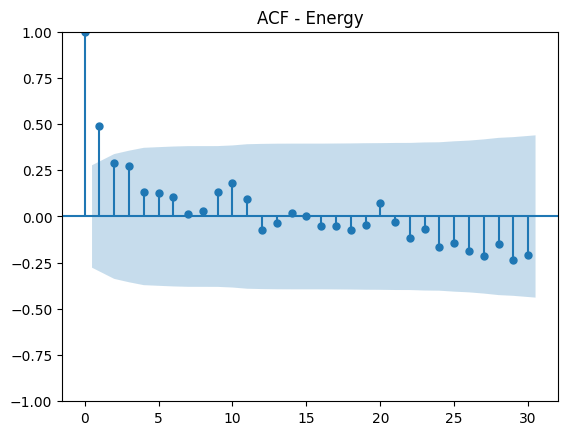

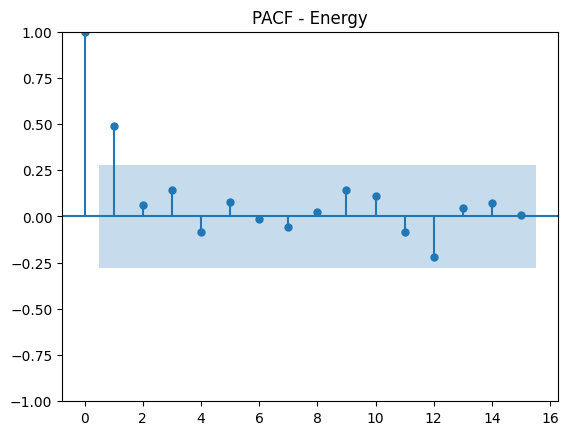

<Figure size 1200x400 with 0 Axes>

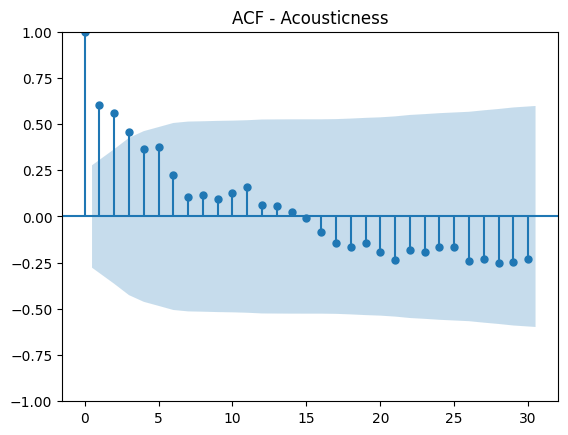

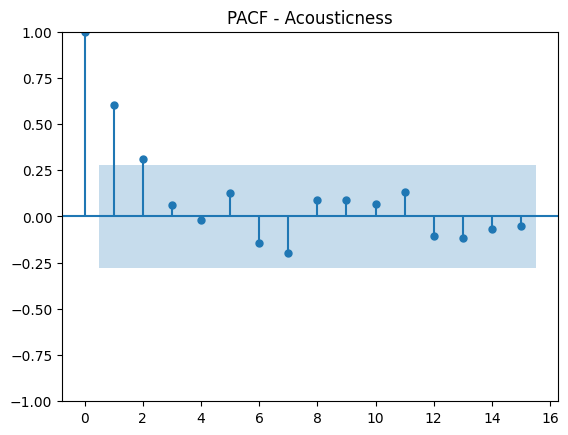

<Figure size 1200x400 with 0 Axes>

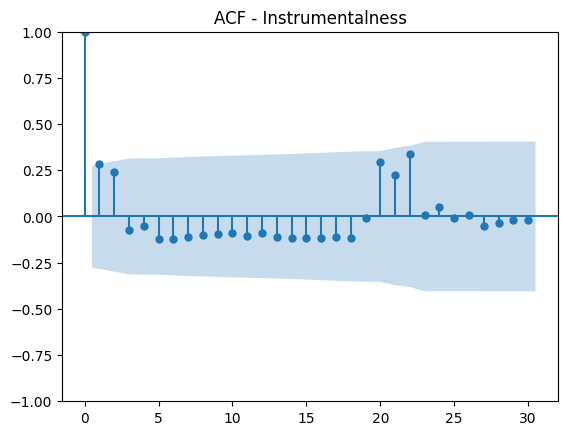

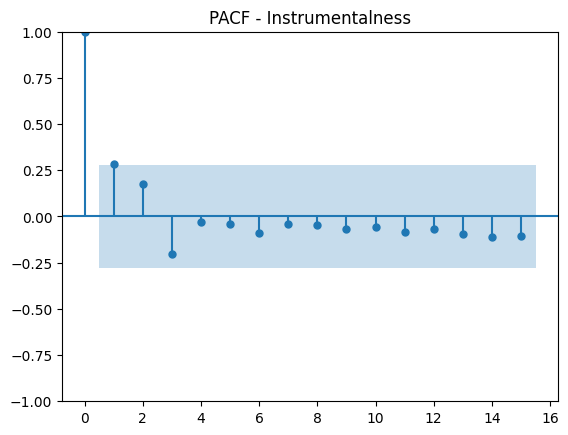

<Figure size 1200x400 with 0 Axes>

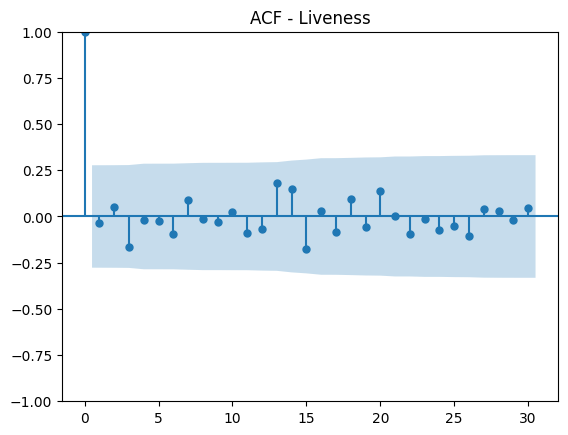

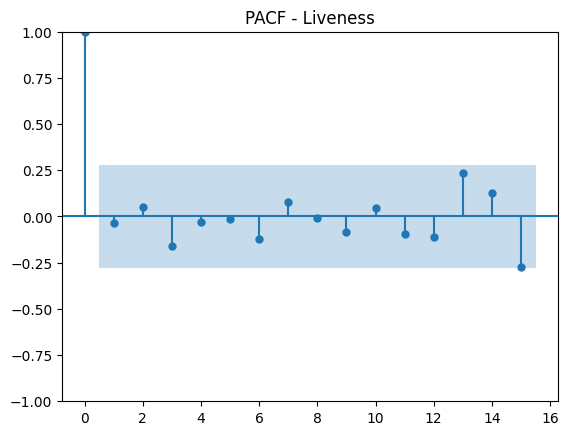

<Figure size 1200x400 with 0 Axes>

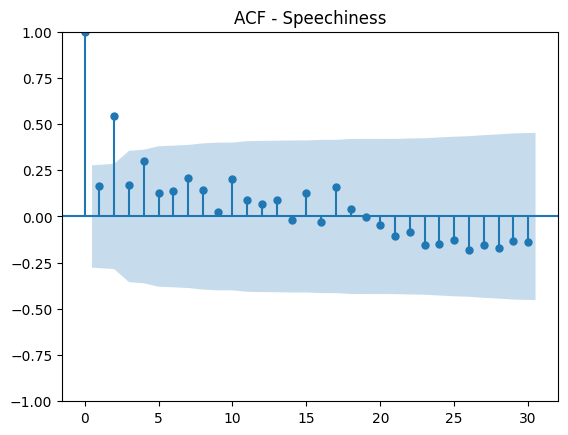

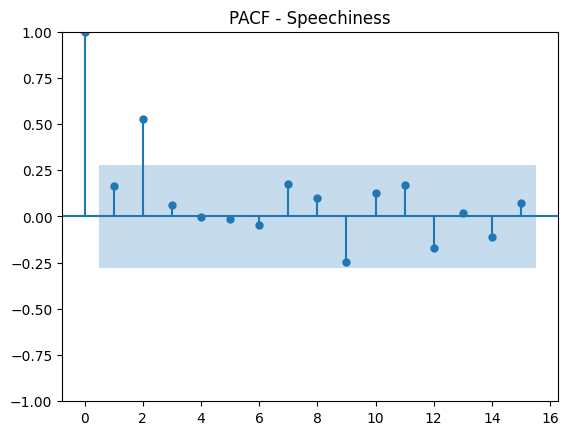

In [30]:
# Assuming spotify_resampled_yearly is your DataFrame with resampled yearly data

# Autocorrelation and Partial Autocorrelation for 'BPM'
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['bpm'], lags=30, title='ACF - BPM')
plot_pacf(spotify_resampled_yearly['bpm'], lags=15, title='PACF - BPM')  # Reduce the number of lags
plt.show()

# Repeat for other variables
# Danceability
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['danceability_%'], lags=30, title='ACF - Danceability')
plot_pacf(spotify_resampled_yearly['danceability_%'], lags=15, title='PACF - Danceability')
plt.show()

# Valence
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['valence_%'], lags=30, title='ACF - Valence')
plot_pacf(spotify_resampled_yearly['valence_%'], lags=15, title='PACF - Valence')
plt.show()

# Energy
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['energy_%'], lags=30, title='ACF - Energy')
plot_pacf(spotify_resampled_yearly['energy_%'], lags=15, title='PACF - Energy')
plt.show()

# Acousticness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['acousticness_%'], lags=30, title='ACF - Acousticness')
plot_pacf(spotify_resampled_yearly['acousticness_%'], lags=15, title='PACF - Acousticness')
plt.show()

# Instrumentalness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['instrumentalness_%'], lags=30, title='ACF - Instrumentalness')
plot_pacf(spotify_resampled_yearly['instrumentalness_%'], lags=15, title='PACF - Instrumentalness')
plt.show()

# Liveness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['liveness_%'], lags=30, title='ACF - Liveness')
plot_pacf(spotify_resampled_yearly['liveness_%'], lags=15, title='PACF - Liveness')
plt.show()

# Speechiness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_yearly['speechiness_%'], lags=30, title='ACF - Speechiness')
plot_pacf(spotify_resampled_yearly['speechiness_%'], lags=15, title='PACF - Speechiness')
plt.show()


In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming spotify_resampled_yearly is your DataFrame with resampled yearly data

# ARIMA modeling for 'BPM'
order_bpm = (1, 0, 13)
model_bpm = ARIMA(spotify_resampled_yearly['bpm'], order=order_bpm)
results_bpm = model_bpm.fit()

# Print the model summary
print(results_bpm.summary())

# Repeat for other variables
# Danceability
order_danceability = (9, 0, 4)
model_danceability = ARIMA(spotify_resampled_yearly['danceability_%'], order=order_danceability)
results_danceability = model_danceability.fit()
print(results_danceability.summary())

# Valence
order_valence = (0, 0, 9)
model_valence = ARIMA(spotify_resampled_yearly['valence_%'], order=order_valence)
results_valence = model_valence.fit()
print(results_valence.summary())

# Energy
order_energy = (0, 0, 1)
model_energy = ARIMA(spotify_resampled_yearly['energy_%'], order=order_energy)
results_energy = model_energy.fit()
print(results_energy.summary())

# Acousticness
order_acousticness = (1, 0, 4)
model_acousticness = ARIMA(spotify_resampled_yearly['acousticness_%'], order=order_acousticness)
results_acousticness = model_acousticness.fit()
print(results_acousticness.summary())

# Instrumentalness
order_instrumentalness = (0, 0, 1)
model_instrumentalness = ARIMA(spotify_resampled_yearly['instrumentalness_%'], order=order_instrumentalness)
results_instrumentalness = model_instrumentalness.fit()
print(results_instrumentalness.summary())

# Liveness
order_liveness = (14, 0, 2)
model_liveness = ARIMA(spotify_resampled_yearly['liveness_%'], order=order_liveness)
results_liveness = model_liveness.fit()
print(results_liveness.summary())

# Speechiness
order_speechiness = (1, 0, 3)
model_speechiness = ARIMA(spotify_resampled_yearly['speechiness_%'], order=order_speechiness)
results_speechiness = model_speechiness.fit()
print(results_speechiness.summary())

C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starti

                               SARIMAX Results                                
Dep. Variable:                    bpm   No. Observations:                   50
Model:                ARIMA(1, 0, 13)   Log Likelihood                -205.838
Date:                Fri, 22 Dec 2023   AIC                            443.676
Time:                        09:50:11   BIC                            474.269
Sample:                             0   HQIC                           455.326
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.0494      1.582     76.537      0.000     117.950     124.149
ar.L1          0.4576      0.666      0.687      0.492      -0.848       1.764
ma.L1         -0.5179     11.096     -0.047      0.9

C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

                               SARIMAX Results                                
Dep. Variable:         danceability_%   No. Observations:                   50
Model:                 ARIMA(9, 0, 4)   Log Likelihood                -193.239
Date:                Fri, 22 Dec 2023   AIC                            416.479
Time:                        09:50:12   BIC                            445.159
Sample:                             0   HQIC                           427.400
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.2743      1.603     36.979      0.000      56.133      62.416
ar.L1          0.2252      0.378      0.596      0.551      -0.516       0.966
ar.L2         -0.6810      0.341     -2.000      0.0

C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

                               SARIMAX Results                                
Dep. Variable:         acousticness_%   No. Observations:                   50
Model:                 ARIMA(1, 0, 4)   Log Likelihood                -216.321
Date:                Fri, 22 Dec 2023   AIC                            446.642
Time:                        09:50:14   BIC                            460.026
Sample:                             0   HQIC                           451.739
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8640     10.676      2.891      0.004       9.940      51.788
ar.L1          0.7422      0.180      4.124      0.000       0.389       1.095
ma.L1         -0.5177      0.207     -2.499      0.0

C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fevc_\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

                               SARIMAX Results                                
Dep. Variable:             liveness_%   No. Observations:                   50
Model:                ARIMA(14, 0, 2)   Log Likelihood                -187.069
Date:                Fri, 22 Dec 2023   AIC                            410.138
Time:                        09:50:15   BIC                            444.554
Sample:                             0   HQIC                           423.244
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7154      3.076      6.085      0.000      12.687      24.744
ar.L1         -0.8081      0.282     -2.866      0.004      -1.361      -0.255
ar.L2         -0.0849      0.480     -0.177      0.8

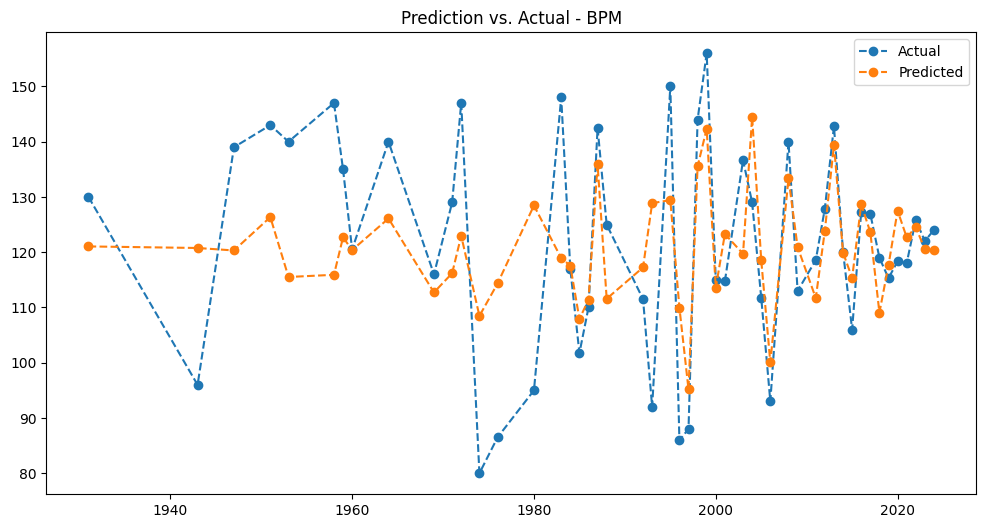

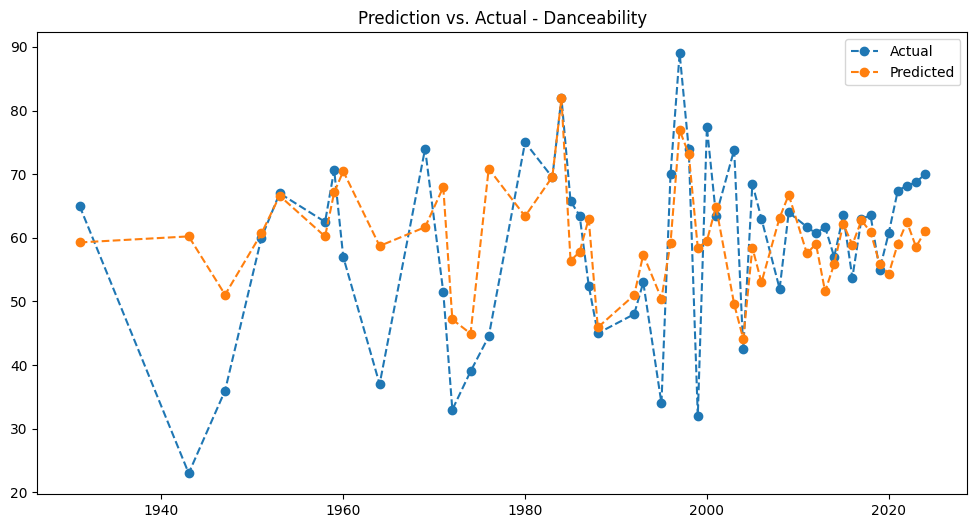

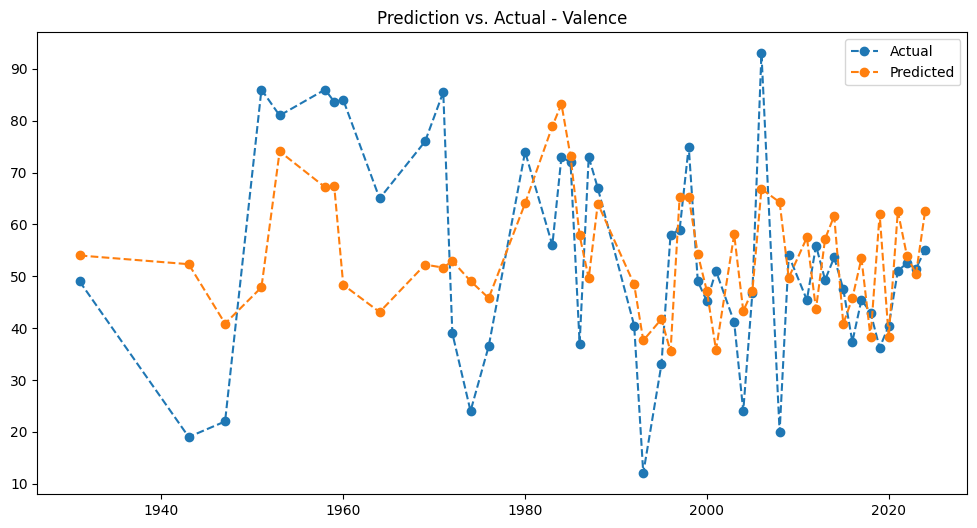

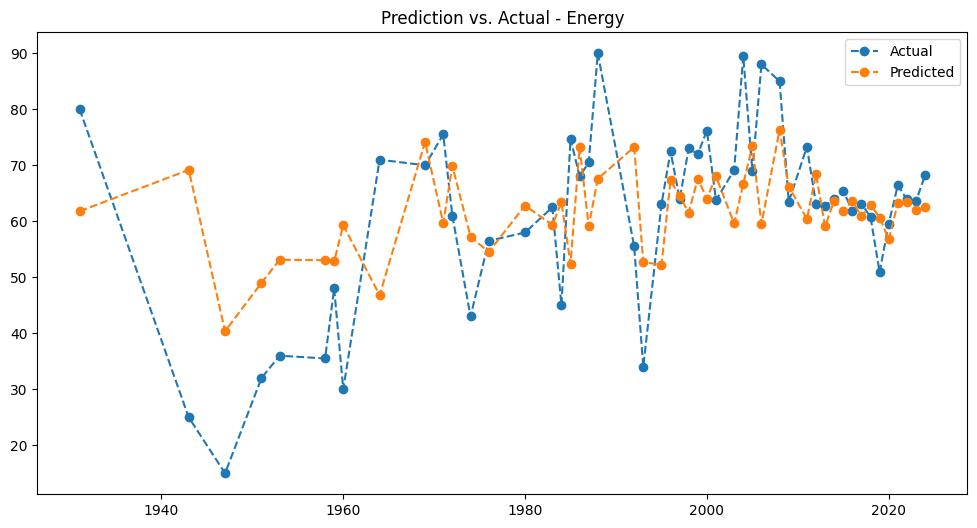

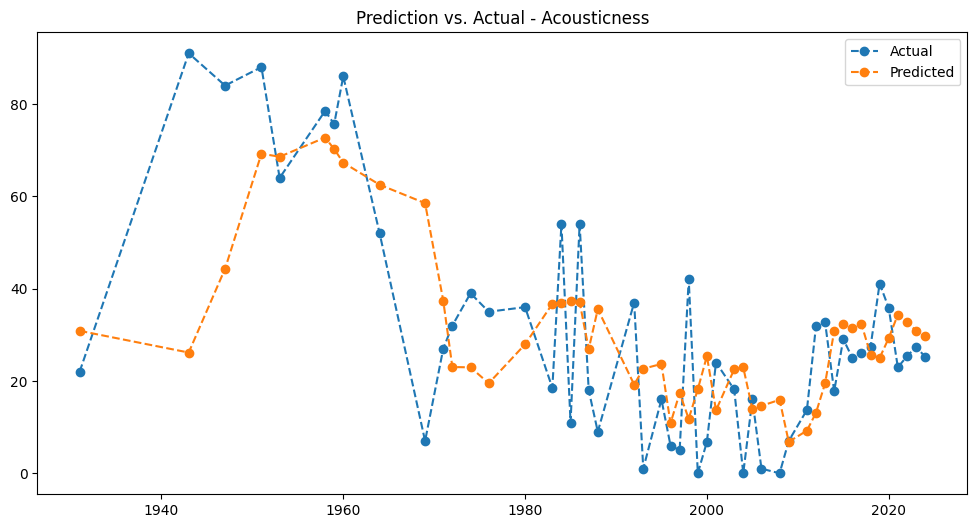

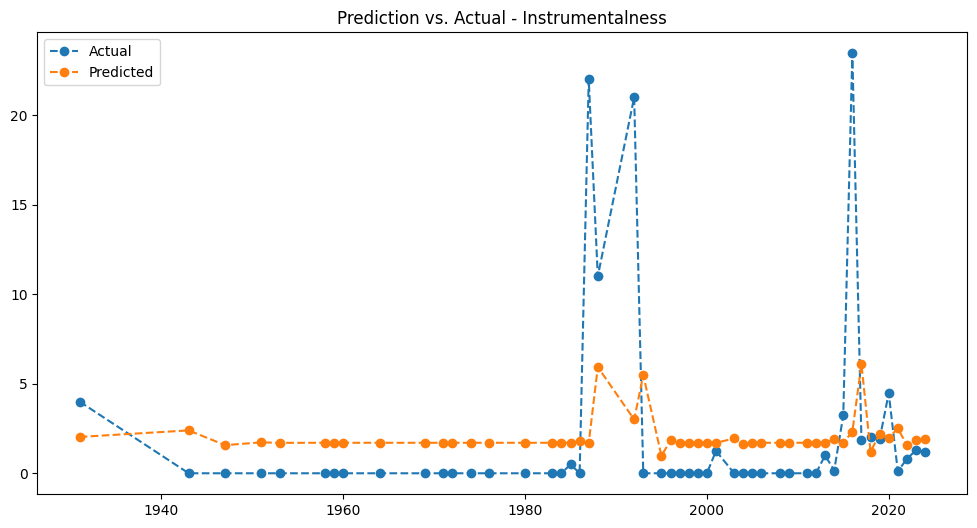

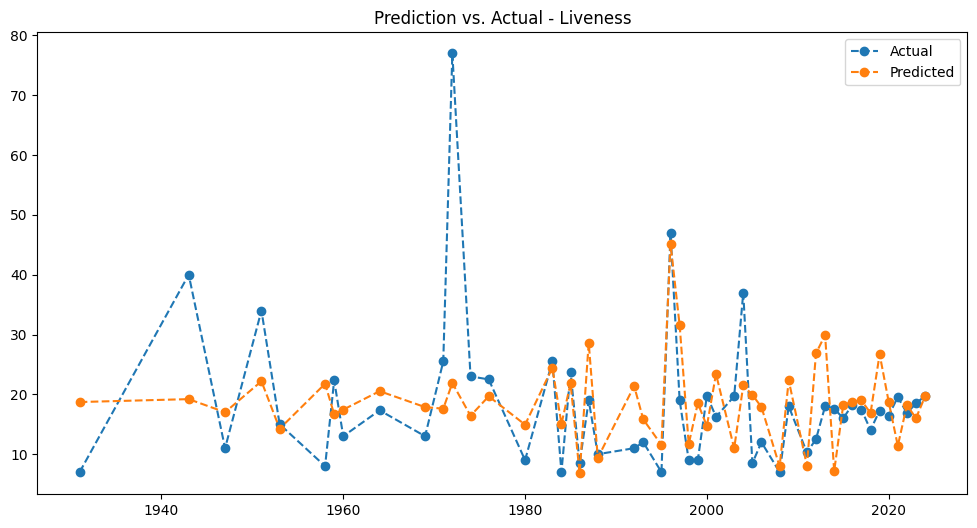

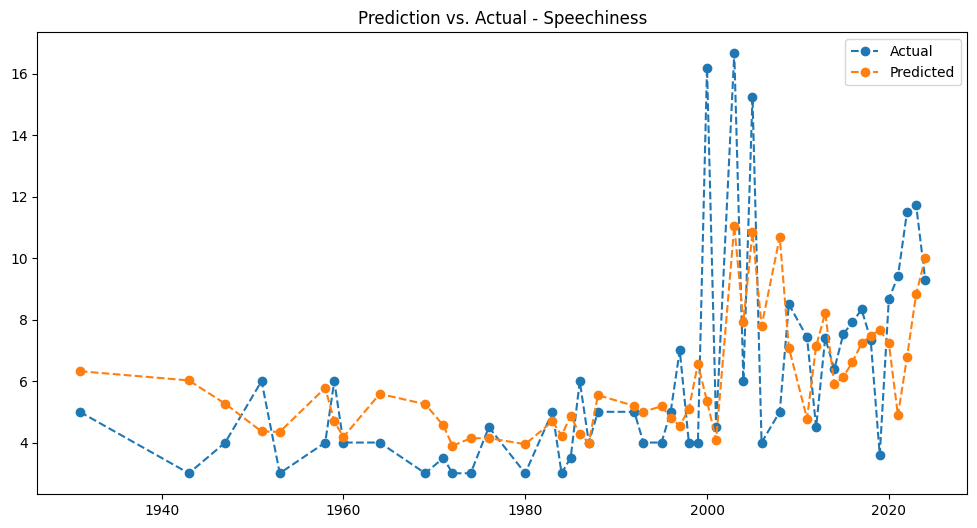

In [36]:
# Assuming spotify_resampled_yearly is your DataFrame with resampled yearly data

# Prediction vs. Actual for 'BPM'
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['bpm'], label='Actual', linestyle='--', marker='o')
plt.plot(results_bpm.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - BPM')
plt.legend()
plt.show()

# Repeat for other variables
# Danceability
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['danceability_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_danceability.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - Danceability')
plt.legend()
plt.show()

# Valence
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['valence_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_valence.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - Valence')
plt.legend()
plt.show()

# Energy
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['energy_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_energy.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - Energy')
plt.legend()
plt.show()

# Acousticness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['acousticness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_acousticness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - Acousticness')
plt.legend()
plt.show()

# Instrumentalness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['instrumentalness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_instrumentalness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - Instrumentalness')
plt.legend()
plt.show()

# Liveness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['liveness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_liveness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - Liveness')
plt.legend()
plt.show()

# Speechiness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_yearly['speechiness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_speechiness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Prediction vs. Actual - Speechiness')
plt.legend()
plt.show()


In [37]:
# Assuming spotify_resampled_yearly is your DataFrame with resampled yearly data

# Model evaluation for 'BPM'
mse_bpm = mean_squared_error(spotify_resampled_yearly['bpm'], results_bpm.predict())
print(f'Mean Squared Error (BPM): {mse_bpm}')

# Repeat for other variables
# Danceability
mse_danceability = mean_squared_error(spotify_resampled_yearly['danceability_%'], results_danceability.predict())
print(f'Mean Squared Error (Danceability): {mse_danceability}')

# Valence
mse_valence = mean_squared_error(spotify_resampled_yearly['valence_%'], results_valence.predict())
print(f'Mean Squared Error (Valence): {mse_valence}')

# Energy
mse_energy = mean_squared_error(spotify_resampled_yearly['energy_%'], results_energy.predict())
print(f'Mean Squared Error (Energy): {mse_energy}')

# Acousticness
mse_acousticness = mean_squared_error(spotify_resampled_yearly['acousticness_%'], results_acousticness.predict())
print(f'Mean Squared Error (Acousticness): {mse_acousticness}')

# Instrumentalness
mse_instrumentalness = mean_squared_error(spotify_resampled_yearly['instrumentalness_%'], results_instrumentalness.predict())
print(f'Mean Squared Error (Instrumentalness): {mse_instrumentalness}')

# Liveness
mse_liveness = mean_squared_error(spotify_resampled_yearly['liveness_%'], results_liveness.predict())
print(f'Mean Squared Error (Liveness): {mse_liveness}')

# Speechiness
mse_speechiness = mean_squared_error(spotify_resampled_yearly['speechiness_%'], results_speechiness.predict())
print(f'Mean Squared Error (Speechiness): {mse_speechiness}')


Mean Squared Error (BPM): 234.10746517524876
Mean Squared Error (Danceability): 140.5822003353297
Mean Squared Error (Valence): 324.16834558234336
Mean Squared Error (Energy): 208.03762097064148
Mean Squared Error (Acousticness): 351.67667914298727
Mean Squared Error (Instrumentalness): 27.48871150126838
Mean Squared Error (Liveness): 119.96718604190133
Mean Squared Error (Speechiness): 7.361398286473133
